In [47]:
# modelling
from keras.models import save_model, load_model
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

parent_dir = '../../'

In [2]:
model3 = load_model(parent_dir + 'models/model3', custom_objects = None, compile = True)

/opt/anaconda3/envs/cap-env/lib/python3.6/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [3]:
val_folder = parent_dir + 'data/seg_val/'
test_folder = parent_dir + 'data/seg_test/'
train_folder = parent_dir + 'data/seg_train/'

In [4]:
# test generator:
test_gen = ImageDataGenerator(rescale = 1. / 255).flow_from_directory(test_folder, batch_size = 32)

# train generator:
train_gen = ImageDataGenerator(rescale = 1. / 255).flow_from_directory(train_folder, batch_size = 32)

# val generator:
val_gen = ImageDataGenerator(rescale = 1. / 255).flow_from_directory(val_folder, batch_size = 32)

Found 3000 images belonging to 6 classes.
Found 11237 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.


In [13]:
test_gen.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [5]:
# create the data sets
train_images, train_labels = next(train_gen)
test_images, test_labels = next(test_gen)
val_images, val_labels = next(val_gen)

In [7]:
test_images.shape

(32, 256, 256, 3)

In [6]:
model3.predict(test_images)

array([[0.16573249, 0.16693017, 0.17379501, 0.17918009, 0.17101656,
        0.1433457 ],
       [0.16109669, 0.16759814, 0.17765938, 0.17723939, 0.18090872,
        0.13549763],
       [0.15720785, 0.17384814, 0.18681912, 0.17013939, 0.17434406,
        0.13764152],
       [0.15734664, 0.17150638, 0.17908792, 0.16801406, 0.17462792,
        0.14941701],
       [0.16013949, 0.17041866, 0.17549367, 0.16861415, 0.17680645,
        0.1485276 ],
       [0.16224767, 0.16805796, 0.18280634, 0.16581647, 0.17367283,
        0.14739877],
       [0.15898156, 0.17020872, 0.1784074 , 0.17289793, 0.18066934,
        0.13883507],
       [0.16017428, 0.16914517, 0.18145882, 0.16565847, 0.17978019,
        0.14378309],
       [0.16841286, 0.16735521, 0.18180384, 0.1658809 , 0.17709635,
        0.13945086],
       [0.15903398, 0.17377841, 0.18348305, 0.16432697, 0.1761258 ,
        0.14325167],
       [0.1680005 , 0.16931745, 0.17704627, 0.16849394, 0.18483466,
        0.1323071 ],
       [0.16611257, 0

In [8]:
preds = model3.predict(test_images)

In [10]:
test_labels

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1.

In [14]:
preds.view

<function ndarray.view>

In [11]:
preds[0]

array([0.16573249, 0.16693017, 0.17379501, 0.17918009, 0.17101656,
       0.1433457 ], dtype=float32)

In [12]:
test_labels[0]

array([0., 0., 0., 0., 1., 0.], dtype=float32)

In [16]:
import numpy as np

In [22]:
y_hat = np.argmax(preds, axis = 1)

In [23]:
y_true = np.argmax(test_labels, axis = 1)

In [24]:
y_true

array([4, 2, 2, 4, 5, 0, 3, 3, 3, 4, 0, 2, 3, 1, 4, 4, 3, 1, 5, 5, 4, 3,
       1, 4, 3, 2, 3, 0, 1, 1, 0, 5])

In [25]:
y_hat

array([3, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2,
       2, 4, 2, 3, 2, 4, 3, 2, 2, 2])

In [ ]:
np.argmax(preds, 0)

In [26]:
confusion_matrix(y_true, y_hat)

array([[0, 0, 2, 0, 2, 0],
       [0, 0, 4, 1, 0, 0],
       [0, 0, 1, 1, 2, 0],
       [0, 0, 7, 0, 1, 0],
       [0, 0, 3, 3, 1, 0],
       [0, 0, 3, 0, 1, 0]])

In [48]:
def evaluation(y, y_hat, title = 'Confusion Matrix'):
    '''takes in true values and predicted values.
    The function then prints out a classifcation report
    as well as a confusion matrix using seaborn's heatmap.'''
    cm = confusion_matrix(y, y_hat)
#     precision = precision_score(y, y_hat)
#     recall = recall_score(y, y_hat)
    accuracy = accuracy_score(y,y_hat)
#     print(classification_report(y, y_hat))
#     print('Recall: ', recall)
    print('Accuracy: ', accuracy)
#     print('Precision: ', precision)
    sns.heatmap(cm,  cmap= 'Greens', annot=True, fmt='d')
    plt.xlabel('predicted')
    plt.ylabel('actual')
    plt.title(title)
    plt.show()

Accuracy:  0.0625


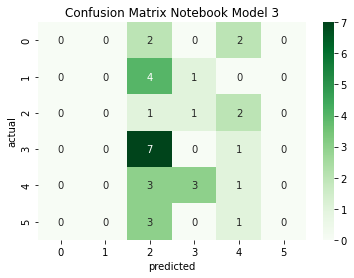

In [49]:
evaluation(y_true, y_hat, title = 'Confusion Matrix Notebook Model 3')

In [57]:
test_gen.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

Accuracy:  0.0625


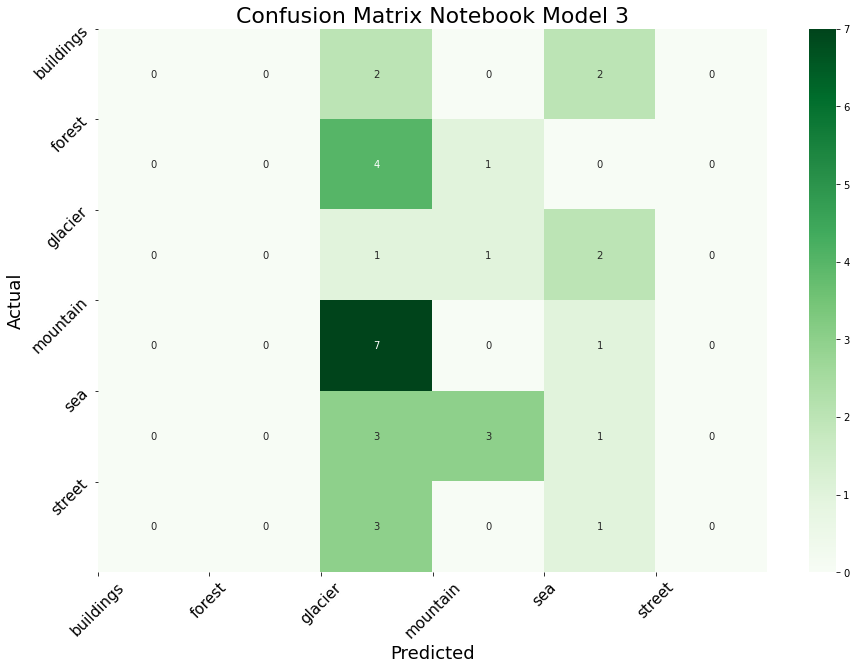

In [71]:
cm = confusion_matrix(y_true, y_hat)
accuracy = accuracy_score(y_true, y_hat)
print('Accuracy: ', accuracy)
plt.subplots(figsize = (15, 10))
sns.heatmap(cm,  cmap= 'Greens', annot=True, fmt='d')
plt.xticks(ticks = list(test_gen.class_indices.values()), labels = list(test_gen.class_indices.keys()), rotation = 45, fontsize = 15)
plt.yticks(ticks = list(test_gen.class_indices.values()), labels = list(test_gen.class_indices.keys()), rotation = 45, fontsize = 15)
plt.xlabel('Predicted', fontsize = 18)
plt.ylabel('Actual', fontsize = 18)
plt.title('Confusion Matrix Notebook Model 3', fontsize = 22)
plt.show()

In [27]:
test_gen.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [28]:
y_true == y_hat

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False])

In [29]:
test_images.imag

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 